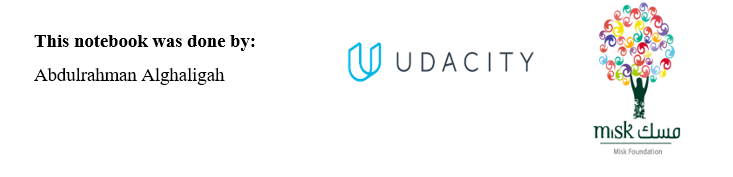

# (Ford GoBike Data Exploration)

## Preliminary Wrangling

> This document explores a dataset contains information about individual rides made in a bike-sharing system for approximately 183412 bikes.

In [1]:
# import all packages and set plots to be embedded inlineExploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings # importing warnings to prevent warnings message with outputs
warnings.simplefilter('ignore')

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv') # loading the dataset

In [3]:
df.shape # printing the number of rows and column

(183412, 16)

In [4]:
df.head()# printing the first 5 rowa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.duplicated().sum()#check for duplicated rows

0

In [7]:
df.isnull().sum()#check for null 

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df=df.dropna()# drop rows with null values

In [9]:
# some variables need to be changed to more appropriate data type 

# changing start and end time to datetime type
df['start_time'],df['end_time']=pd.to_datetime(df['start_time']),pd.to_datetime(df['end_time'])

#changing member birth year to integer type
df['member_birth_year']=df.member_birth_year.astype(int)

# changing 
df['user_type']=df.user_type.astype('category');
df['member_gender']=df.member_gender.astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [11]:
df.dtypes # checking the data types after changing them

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip            object
dtype: object

### What is the structure of your dataset?

> After I cleaned the data there are 174952 rows (bike) in our dataset with 13 columns(features), most variables are numeric,others can be datetime, category and objects (string).  

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the duration of the trip in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I expect that the gender of the user will strongly affect the duration of the trip. I think also the age of the rider and user type feature will help me investigating my feature of interest. I will look also for the most frequent station to start and to end the trip

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I'll start by looking at the distribution of the main variable of interest: duration_sec.

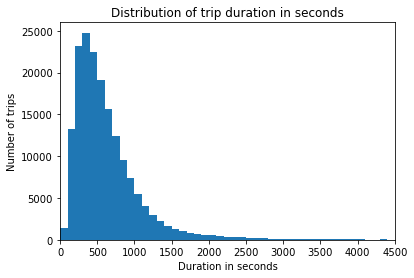

In [12]:
bins=np.arange(0,df['duration_sec'].max()+100,100)
plt.hist(data=df,x='duration_sec',bins=bins)
plt.xlim(0,4500)
plt.title('Distribution of trip duration in seconds')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of trips');

- It's clear that the plot is right-skewed so,I will scale the x-axis to prevent highly skewed distribution and I will apply log-normal distribution.

- The plot looks difficult because it is measure duration in seconds so I will convert the seconds to minutes to make it in a more reasonable way.

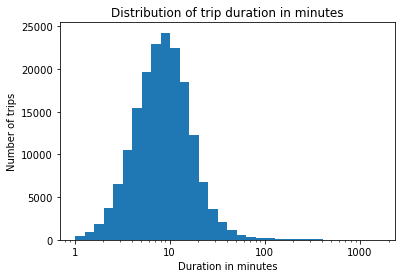

In [13]:
df['duration_min']=df['duration_sec']/60 # making a new column in minutes 

bins=10**np.arange(0.007179,0.1+3.148952,0.1)
plt.hist(data=df,x='duration_min',bins=bins)
ticks =  [1,10,100,1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks,labels);

plt.xscale('log');
plt.title('Distribution of trip duration in minutes')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of trips');
plt.xticks(ticks,labels);


In [14]:

np.log10(df['duration_min'].describe())

count    5.242919
mean     1.069423
std      1.437276
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration_min, dtype: float64

> It seems that most of the trips completed in a short duration (arround 10 mins).

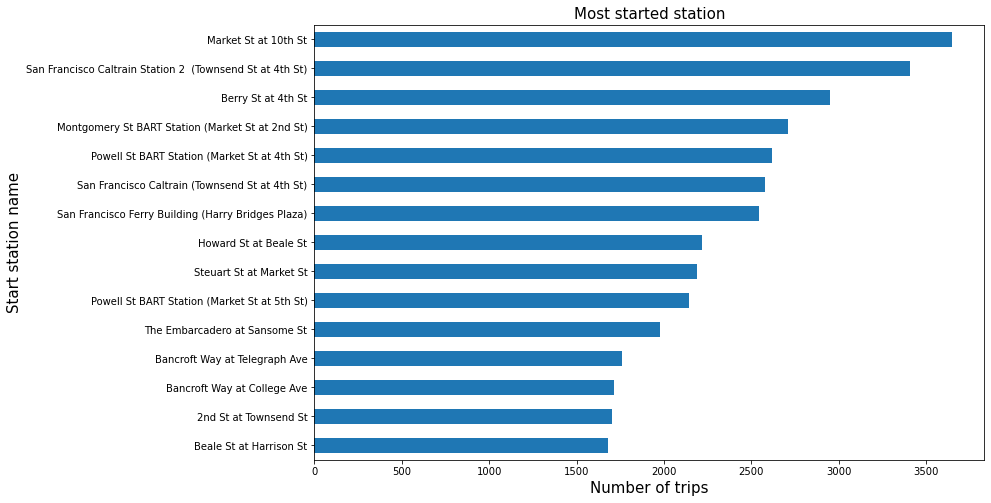

In [15]:
plt.figure(figsize=[12,8])
station_names=df['start_station_name'].value_counts().sort_values(ascending=True).tail(15)
station_names.plot(kind='barh')
plt.xlabel('Number of trips',fontsize=15)
plt.ylabel('Start station name',fontsize=15)
plt.title('Most started station',fontsize=15);

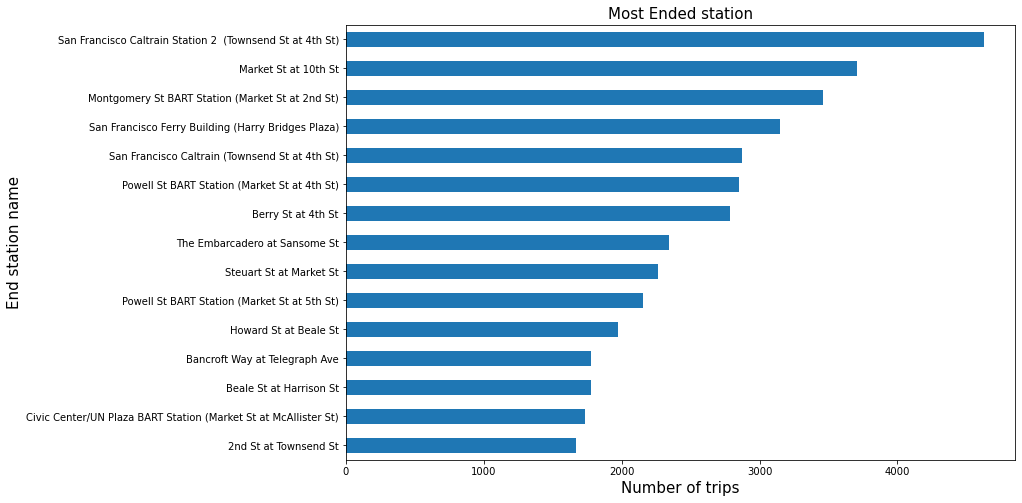

In [16]:
plt.figure(figsize=[12,8])
station_names=df['end_station_name'].value_counts().sort_values(ascending=True).tail(15)
station_names.plot(kind='barh')
plt.xlabel('Number of trips',fontsize=15)
plt.ylabel('End station name',fontsize=15);
plt.title('Most Ended station',fontsize=15);

It seems that San Francisco Caltrain station 2 and Market St at 10th St are the most used station for both the start and end of station trips.

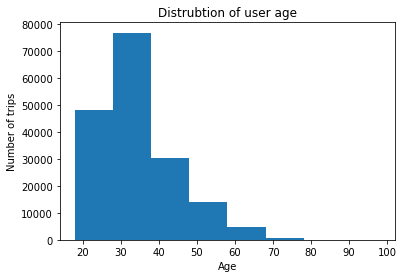

In [17]:
df['age']=2019-df['member_birth_year'] # creating a column for the age of the rider
bins=np.arange(18,100,10)
plt.hist(data=df,x='age',bins=bins)
plt.xlabel('Age')
plt.ylabel('Number of trips')
plt.title('Distrubtion of user age');

It looks like users with ages between 20-40 have done trips more than other ages.

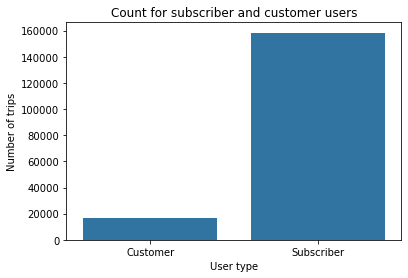

In [18]:
sb.countplot(data=df,x='user_type',color=sb.color_palette()[0]);
plt.title('Count for subscriber and customer users')
plt.xlabel('User type')
plt.ylabel('Number of trips');

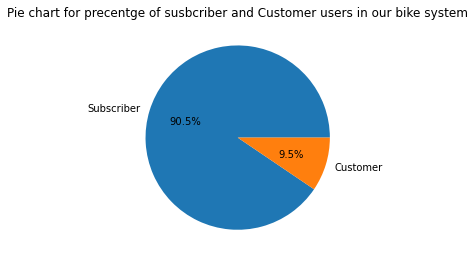

In [19]:
fig = plt.figure()
pie_plot = fig.add_axes([0,0,1,0.8])
pie_plot.pie(df.user_type.value_counts(), labels =['Subscriber','Customer'] ,autopct='%1.1f%%');
plt.title('Pie chart for precentge of susbcriber and Customer users in our bike system');


It is clear that number of subscribers are more than customers with a huge difference.

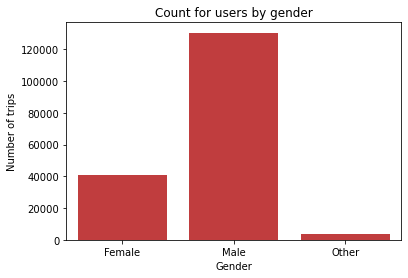

In [20]:
sb.countplot(data=df,x='member_gender',color=sb.color_palette()[3]);
plt.title('Count for users by gender')
plt.xlabel('Gender')
plt.ylabel('Number of trips');

The male gender is the most gender who made trips in our Bike system.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable took on a large range of values, so I changed seconds to minutes and I scaled using log transform, under the transformation the peak was around 10 mins.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the duration of the trip I made a new column to convert time in seconds to time minutes. Also, when investigating users ages I created a new column for the age of the user.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

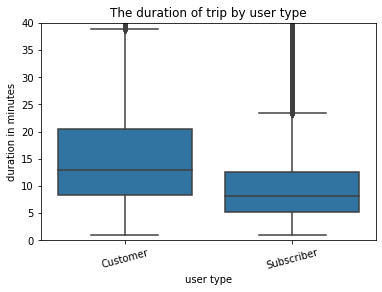

In [21]:
base_color=sb.color_palette()[0]
sb.boxplot(data=df,x='user_type',y='duration_min',color=base_color)
plt.xticks(rotation=15)
plt.ylim(0,40);
plt.xlabel('user type')
plt.ylabel('duration in minutes');
plt.title('The duration of trip by user type');

It looks like subscriber users finish the trip faster than customer users.

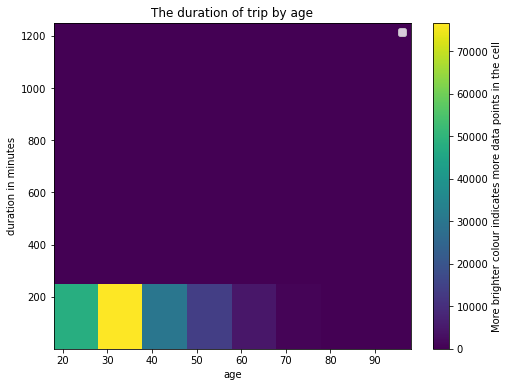

In [27]:
plt.figure(figsize=[8,6])

plt.legend(['Subcriber','Customer','S','A','W','Q','X']);

bins_x=np.arange(18,100,10)
bins_y=np.arange(1,1500,250)
plt.hist2d(data=df,x='age',y='duration_min',bins=[bins_x,bins_y])
plt.colorbar(label='More brighter colour indicates more data points in the cell');
plt.ylim(0.1500)
plt.xlabel('age')
plt.ylabel('duration in minutes');
plt.title('The duration of trip by age');

In this heatmap, we support our findings from the previous section that most frequent users age between 20 and 40, and we have more findings here is that younger age users have spent more duration in the trips.

In [23]:
df[['age','duration_min']].describe()

,age,duration_min
count,174952.000000,174952.000000
mean,34.196865,11.733379
std,10.118731,27.370082
min,18.000000,1.016667
25%,27.000000,5.383333
50%,32.000000,8.500000
75%,39.000000,13.150000
max,141.000000,1409.133333


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We saw that user type has a large effect on the duration of the trip, it is clear that subscribers users spent less time than customer users. We also saw that older users spent less time on the trips where younger users spend more duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed that there is a relationship between age and user_type, as subscribers users and old age users have spent less time maybe we can conclude that most of the subscriber users are old age people.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

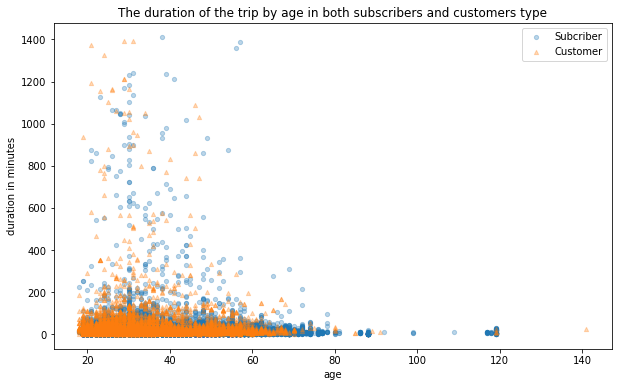

In [24]:
plt.figure(figsize=[10,6])

userType_marker=[['Subscriber','o'],['Customer','^']]

for userType,marker in userType_marker:
    plot_data=df.loc[df['user_type']==userType]
    sb.regplot(data=plot_data,x='age',y='duration_min',marker=marker,fit_reg=False,scatter_kws={"alpha" : 0.3,"s":18})
plt.xlabel('age')
plt.ylabel('duration in minutes')
plt.legend(['Subcriber','Customer']);
plt.title('The duration of the trip by age in both subscribers and customers type');

It seems like our findings in the heatmap in the last section which is older people spent less time in trips, and we have more findings here is that for all subscriber and customer users it is the same younger age user spent more duration where older spent less.

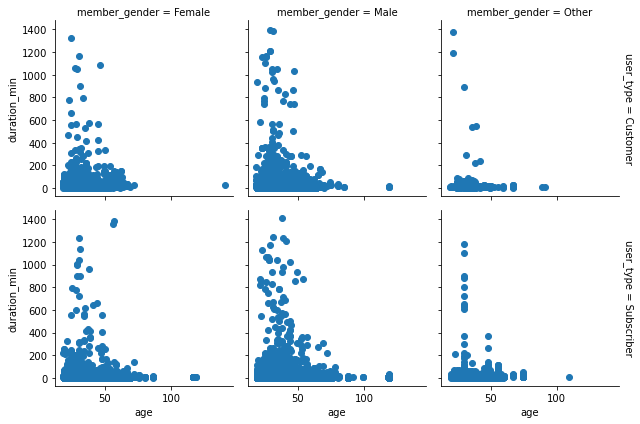

In [25]:
g=sb.FacetGrid(data=df,col='member_gender',row='user_type',margin_titles=True)
g.map(plt.scatter,'age','duration_min');

The male user either subscriber or customer type spend more duration, and also here we can see that older age users spend less duration time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> User types and gender have given me so much strength to indicates who are the most users spending time in a trip, also age feature gave me great insights about the age of the users who spend more time in a trip to help us focusing on this range of age.

### Were there any interesting or surprising interactions between features?

 - I noticed that the male gender used our bike system more and spend more time on the trips.
 -  Subscriber users are faster than customer users.



In [26]:
df.to_csv('201902-fordgobike-tripdata_clean.csv')# preparing for slides